# Hybrid flow shop

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/PyJobShop/PyJobShop/blob/main/examples/hybrid_flow_shop.ipynb)

> If you're using this notebook in Google Colab, be sure to install PyJobShop first by executing ```pip install pyjobshop``` in a cell.

The hybrid flow shop (HFS) is a common manufacturing environment in practice and widely studied by scheduling researchers. See for example the surveys by [Ruiz and Vázquez-Rodríguez (2010)](https://www.sciencedirect.com/science/article/pii/S0377221709006390) and [Ribas et al. (2010)](https://www.sciencedirect.com/science/article/pii/S0305054809002883) for an overview of HFS studies.

In this notebook, we demonstrate how to model and solve a HFS problem using PyJobShop.

## Problem description
The HFS problem is characterized as follows:

- There is a set of $n$ jobs that need to be processed in a series of stages.
- The number of processing stages is at least 2.
- Each stage has at least one machine in parallel, and in at least one stage there is more than one machine.
- All jobs are processed in the same production order: production starts in stage 1, then stage 2, etc. until the last stage. A job can only start processing when it has finished processing in the previous stage.

The figure below illustrates a small HFS example with three jobs and three stages. The first and third stage have three machines, and the second stage has two machines.

![HFS](../assets/hybrid-flow-shop.png "HFS")

We can model an HFS problem using PyJobShop. For each job and each stage $k$, define one task. Moreover, we need to ensure that the previous task (job in stage $k-1$) is processed before, which known as a precedence constraint.

Let's now implement the above example using PyJobShop's Model interface.

## Model

In [9]:
num_jobs = 3
num_stages = 3
num_machines = [3, 2, 3]

In [10]:
from pyjobshop import Model

model = Model()

The following will be helpful to plot names with $\LaTeX$ typesetting.

In [11]:
def machine_name(machine, stage):
    return f"$M_{{{machine}{stage}}}$"


def job_name(job: int, stage: int):
    return f"$J_{{{job}{stage}}}$"

First define the machine layout:

In [12]:
stage2machines = {}
for k in range(num_stages):
    stage2machines[k] = [
        model.add_machine(name=machine_name(m, k))
        for m in range(num_machines[k])
    ]

Now, we need to define jobs and the tasks that have to be scheduled, along with the processing time data and precedence constraints, as mentioned earlier.

In [13]:
import random

random.seed(42)

jobs = [model.add_job() for _ in range(num_jobs)]

for j, job in enumerate(jobs):
    tasks = [
        model.add_task(job=job, name=job_name(j, k)) for k in range(num_stages)
    ]

    for stage in range(num_stages):
        for machine in stage2machines[stage]:
            duration = random.randint(1, 20)
            model.add_mode(tasks[stage], machine, duration)

    for idx in range(num_stages - 1):
        first = tasks[idx]
        second = tasks[idx + 1]
        model.add_end_before_start(first, second)

In [14]:
result = model.solve(display=False)

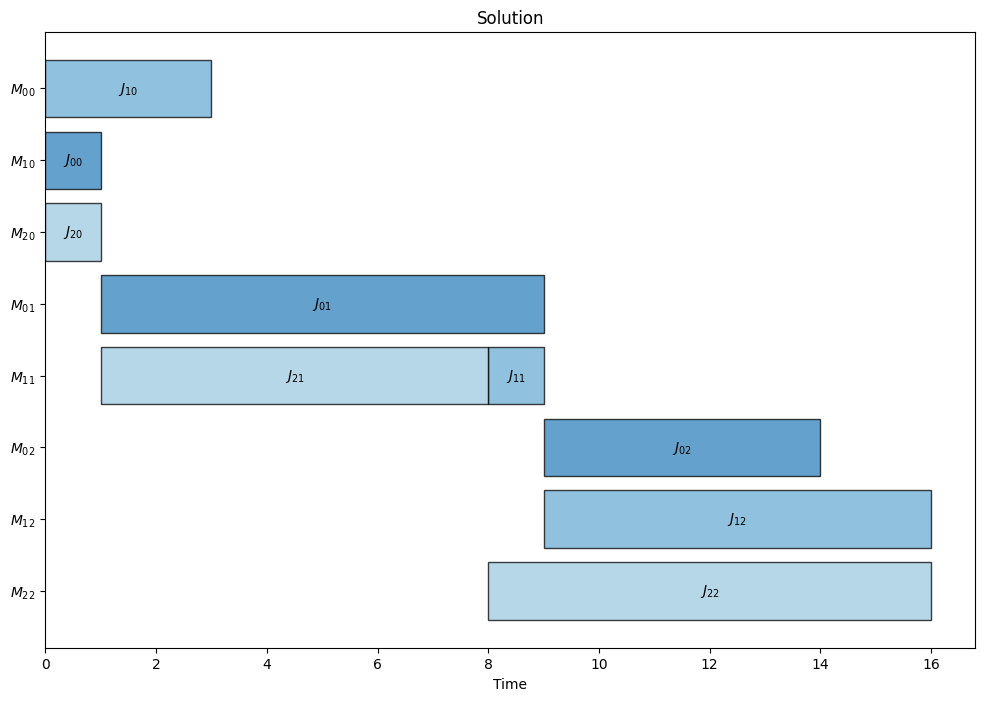

In [15]:
from pyjobshop.plot import plot_machine_gantt

plot_machine_gantt(result.best, model.data(), plot_labels=True)

## Conclusion
This notebooks showed how to model and solve the hybrid flow shop problem using PyJobShop. Specifically, we show how to define the hybrid flow shop problem in terms of tasks and how to add precedence constraints between tasks.